In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv',names=['ID','0','1','2','3','4','5','6','7','8','9'])
df = df.drop(['ID'], axis=1)

In [3]:
features=['0','1','2','3','4','5','6','7','8']
x = df[features]
y = df['9']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y.values,train_size=400, shuffle=False)
# X_train.tail()

# Logistic Regression

In [5]:
logReg_clf = LogisticRegression(random_state=42)
y_pred = []
logReg_clf.fit(X_train, y_train)
y_pred = logReg_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred)
print('Accuracy:', acc*100)
print('confusion matrix\n', cm_log)
print('Misclassification rate: ', (1 - accuracy_score(y_test, y_pred))*100)

Accuracy: 98.93992932862191
confusion matrix
 [[214   2]
 [  1  66]]
Misclassification rate:  1.0600706713780883


In [6]:
#Predicted probabilities of correctly classified instances
Prob_y_pred = []
Prob_y_pred = logReg_clf.predict_proba(X_test)
corr_inst = []
def match(y_test, Prod_y_pred):
    
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            corr_inst.append(np.max(Prob_y_pred[i]))
    return corr_inst

In [7]:
#Root mean-squared margin around decision probability 0.5
summ=0 
corr_inst = match(y_test, Prob_y_pred)
for i in range(0, len(corr_inst)): 
    summ=summ+((corr_inst[i]-0.5)**2) 
s = summ/len(corr_inst)
rms = sqrt(s)
print('RMS margin is:',rms)

RMS margin is: 0.47834185825002423


In [8]:
#Weighted cost
# print(cm_log)
TN = cm_log[0, 0]
FP = cm_log[0, 1]
FN = cm_log[1, 0]
TP = cm_log[1, 1]

c_sum = 0
cost_log = 0
c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
cost_log = (1/6916)*c_sum
print('Cost: ', cost_log)

Cost:  0.01474840948525159


# KNN CLASSIFIER

In [9]:
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score
accuracy = []
mis_class = []
acc=0
for k in range(1,11):
    knn_clf = kNN(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    y_pred = []
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(accuracy_score(y_test, y_pred))
    mis_cls = 1 - accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for neighbours {k}: ", acc*100)
    print(f"Misclassification for neighbours {k}:", mis_cls*100)
    mis_class.append(1 - accuracy_score(y_test, y_pred))
    cm_knn = confusion_matrix(y_test, y_pred)
    print('Confusion matrix:\n ', cm_knn)
    TN = cm_knn[0, 0]
    FP = cm_knn[0, 1]
    FN = cm_knn[1, 0]
    TP = cm_knn[1, 1]
    
    c_sum = 0
    cost_knn = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_knn = (1/6916)*c_sum
    print('Cost: ', cost_knn)
# evaluate accuracy
# print(accuracy)
# print(mis_class)


Accuracy for neighbours 1:  98.23321554770318
Misclassification for neighbours 1: 1.7667844522968212
Confusion matrix:
  [[212   4]
 [  1  66]]
Cost:  0.015037593984962405

Accuracy for neighbours 2:  97.52650176678446
Misclassification for neighbours 2: 2.473498233215543
Confusion matrix:
  [[214   2]
 [  5  62]]
Cost:  0.07258530942741469

Accuracy for neighbours 3:  98.58657243816255
Misclassification for neighbours 3: 1.4134275618374548
Confusion matrix:
  [[212   4]
 [  0  67]]
Cost:  0.000578368999421631

Accuracy for neighbours 4:  98.23321554770318
Misclassification for neighbours 4: 1.7667844522968212
Confusion matrix:
  [[213   3]
 [  2  65]]
Cost:  0.029352226720647773

Accuracy for neighbours 5:  98.23321554770318
Misclassification for neighbours 5: 1.7667844522968212
Confusion matrix:
  [[212   4]
 [  1  66]]
Cost:  0.015037593984962405

Accuracy for neighbours 6:  98.93992932862191
Misclassification for neighbours 6: 1.0600706713780883
Confusion matrix:
  [[214   2]
 [  

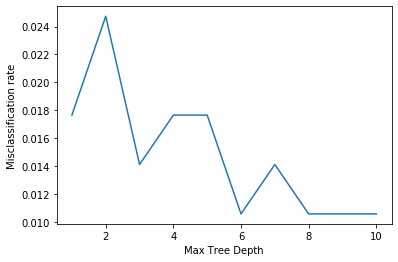

In [10]:
# Prepare the data
x = np.linspace(1, 10, 10)
# x.shape
plt.plot(x, mis_class)
# plt.plot(x, train, label='Train')
plt.ylabel('Misclassification rate')
plt.xlabel('Max Tree Depth')
# plt.plot(x)
# plt.legend()
plt.show()

# Linear Discriminant Analysis(LDA)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y_pred = []
LDA = LinearDiscriminantAnalysis()
lda_clf = LDA.fit(X_train, y_train)
y_pred = lda_clf.predict(X_test)
cm_lda = confusion_matrix(y_test,y_pred)
print('Accuracy: ', (accuracy_score(y_test,y_pred))*100)
mc = (1-accuracy_score(y_test,y_pred))
print('Misclassification rate in %:',mc*100)
print('Confusion matrix:\n ', cm_lda)

Accuracy:  98.23321554770318
Misclassification rate in %: 1.7667844522968212
Confusion matrix:
  [[215   1]
 [  4  63]]


In [12]:
#Weighted cost
print(cm_lda)
TN = cm_lda[0, 0]
FP = cm_lda[0, 1]
FN = cm_lda[1, 0]
TP = cm_lda[1, 1]
# TN,FP,FN,TP

c_sum = 0
cost_lda = 0
c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
cost_lda = (1/6916)*c_sum
print('Cost: ', cost_lda)

[[215   1]
 [  4  63]]
Cost:  0.0579814921920185


# SVM Classifier

SVM 'linear' kernel

In [13]:
from sklearn import svm
# y_pred = []
svm_clf_linear = svm.SVC(kernel='linear', probability = True, random_state=42) # Linear Kernel

#Train the model using the training sets
svm_clf_linear.fit(X_train, y_train)
y_pred = []
#Predict the response for test dataset
y_pred = svm_clf_linear.predict(X_test)

print("Accuracy:",(accuracy_score(y_test, y_pred))*100)
print("Misclassification rate:",(1- accuracy_score(y_test, y_pred))*100)
cm_linear = confusion_matrix(y_test,y_pred)

Accuracy: 98.58657243816255
Misclassification rate: 1.4134275618374548


In [14]:
Prob_y_pred = []
Prob_y_pred = svm_clf_linear.predict_proba(X_test)

In [15]:
corr_inst = []
def matched(y_test, Prod_y_pred):
    
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            corr_inst.append(np.max(Prob_y_pred[i]))
    return corr_inst

In [16]:
corr_inst = matched(y_test, Prob_y_pred)
#Root mean-squared margin around decision probability 0.5
summ=0
rms = 0
for i in range(0, len(corr_inst)): 
    summ=summ+((corr_inst[i]-0.5)**2) 
s = summ/len(corr_inst)
rms = sqrt(s)
print('RMS margin is:',rms)

RMS margin is: 0.46123407546580064


In [17]:
#Weighted cost
print('Confusion matrix:\n ', cm_linear)
TN = cm_linear[0, 0]
FP = cm_linear[0, 1]
FN = cm_linear[1, 0]
TP = cm_linear[1, 1]
TN,FP,FN,TP

# cost0 = 212 + 56
# cost1 = 4 #(FP*1)
# cost100 = 11  #(FN*100)

c_sum = 0
cost_linear = 0
c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
cost_linear = (1/6916)*c_sum
print('Cost: ', cost_linear)

Confusion matrix:
  [[213   3]
 [  1  66]]
Cost:  0.014893001735106997


SVM 'poly' kernel

In [18]:
degree = [2,3,4,5]
for k in degree: 
    #Create a svm Classifier
    clf_poly = svm.SVC(kernel='poly', degree=k, probability=True, random_state=42) # polynomial Kernel

    #Train the model using the training sets
    clf_poly.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = []
    y_pred = clf_poly.predict(X_test)

    print(f"\nAccuracy with {k} degrees:",(accuracy_score(y_test, y_pred))*100)
    print(f"Misclassification rate with {k} degrees:",(1- accuracy_score(y_test, y_pred))*100)
    cm_poly = confusion_matrix(y_test,y_pred)
    Prob_y_pred = []
    Prob_y_pred = clf_poly.predict_proba(X_test)
    corr_inst = matched(y_test, Prob_y_pred)
    summ=0
    rms = 0
    for i in range(0, len(corr_inst)): 
        summ=summ+((corr_inst[i]-0.5)**2) 
    s = summ/len(corr_inst)
    rms = sqrt(s)
    print('RMS margin is:',rms)
    print(cm_poly)
    TN = cm_poly[0, 0]
    FP = cm_poly[0, 1]
    FN = cm_poly[1, 0]
    TP = cm_poly[1, 1]
#     TN,FP,FN,TP
    c_sum = 0
    cost_poly = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_poly = (1/6916)*c_sum
    print('Cost: ', cost_poly)


Accuracy with 2 degrees: 98.93992932862191
Misclassification rate with 2 degrees: 1.0600706713780883
RMS margin is: 0.4619060440032451
[[214   2]
 [  1  66]]
Cost:  0.01474840948525159

Accuracy with 3 degrees: 98.93992932862191
Misclassification rate with 3 degrees: 1.0600706713780883
RMS margin is: 0.4554624119757552
[[215   1]
 [  2  65]]
Cost:  0.029063042220936957

Accuracy with 4 degrees: 96.46643109540636
Misclassification rate with 4 degrees: 3.5335689045936425
RMS margin is: 0.44819685785028984
[[213   3]
 [  7  60]]
Cost:  0.10164835164835165

Accuracy with 5 degrees: 96.46643109540636
Misclassification rate with 5 degrees: 3.5335689045936425
RMS margin is: 0.43897664124737296
[[213   3]
 [  7  60]]
Cost:  0.10164835164835165


SVM 'rbf' kernel

In [19]:
#Create a svm Classifier
clf_rbf = svm.SVC(kernel='rbf', probability = True, random_state=42) # rbf Kernel

#Train the model using the training sets
clf_rbf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = []
y_pred = clf_rbf.predict(X_test)

print("Accuracy:", (accuracy_score(y_test, y_pred))*100)
print("Misclassification rate:",(1- accuracy_score(y_test, y_pred))*100)
cm_rbf = confusion_matrix(y_test,y_pred)

Accuracy: 98.23321554770318
Misclassification rate: 1.7667844522968212


In [20]:
corr_inst = matched(y_test, Prob_y_pred)
#Root mean-squared margin around decision probability 0.5
summ=0
rms = 0
for i in range(0, len(corr_inst)): 
    summ=summ+((corr_inst[i]-0.5)**2) 
s = summ/len(corr_inst)
rms = sqrt(s)
print('RMS margin is:',rms)

RMS margin is: 0.43263544346088184


In [21]:
#Weighted cost
print('Confusion matrix:\n ', cm_rbf)
TN = cm_rbf[0, 0]
FP = cm_rbf[0, 1]
FN = cm_rbf[1, 0]
TP = cm_rbf[1, 1]
TN,FP,FN,TP

c_sum = 0
cost_rbf = 0
c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
cost_rbf = (1/6916)*c_sum
print('Cost: ', cost_rbf)

Confusion matrix:
  [[212   4]
 [  1  66]]
Cost:  0.015037593984962405


SVM 'sigmoid' kernel

In [22]:
#Create a svm Classifier
y_pred = []
clf_sig = svm.SVC(kernel='sigmoid', probability = True, random_state=42) # sigmoid Kernel

#Train the model using the training sets
clf_sig.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = []
y_pred = clf_sig.predict(X_test)

print("Accuracy:", (accuracy_score(y_test, y_pred))*100)
print("Misclassification rate:",(1- accuracy_score(y_test, y_pred))*100)
cm_sigmoid = confusion_matrix(y_test,y_pred)

Accuracy: 16.25441696113074
Misclassification rate: 83.74558303886926


In [23]:
corr_inst = matched(y_test, Prob_y_pred)
# print(len(corr_inst))
#Root mean-squared margin around decision probability 0.5
summ=0
rms = 0
for i in range(0, len(corr_inst)): 
    summ=summ+((corr_inst[i]-0.5)**2) 
s = summ/len(corr_inst)
rms = sqrt(s)
print('RMS margin is:',rms)

RMS margin is: 0.4311013821647495


In [24]:
#Weighted cost
print('Confusion matrix:\n ', cm_sigmoid)
TN = cm_sigmoid[0, 0]
FP = cm_sigmoid[0, 1]
FN = cm_sigmoid[1, 0]
TP = cm_sigmoid[1, 1]
TN,FP,FN,TP

c_sum = 0
cost_sigmoid = 0
c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
cost_sigmoid = (1/6916)*c_sum
print('Cost: ', cost_sigmoid)

Confusion matrix:
  [[ 46 170]
 [ 67   0]]
Cost:  0.9933487565066512


# Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

depth = [3, 4, 5, 6, 7, 8, 9, 10]
mc = []
# depth = [5]
for d in depth: 
    # Create Decision Tree classifer object
    decision_tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)

    # Train Decision Tree Classifer
    decision_tree_clf = decision_tree_clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = []
    y_pred = decision_tree_clf.predict(X_test)

    print(f"\nAccuracy for depth {d}:", (accuracy_score(y_test, y_pred))*100)
    cm_dec = confusion_matrix(y_test, y_pred)
    print(f'Confusion matrix for {d} depth:\n',cm_dec)
    mis_class = 1 - accuracy_score(y_test, y_pred)
    print('Misclassification rate: ', mis_class*100)
    mc.append(mis_class)
#     print(cm_poly)
    TN = cm_dec[0, 0]
    FP = cm_dec[0, 1]
    FN = cm_dec[1, 0]
    TP = cm_dec[1, 1]
#     TN,FP,FN,TP
    c_sum = 0
    cost_dec = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_dec = (1/6916)*c_sum
    print('Cost: ', cost_dec)


Accuracy for depth 3: 96.81978798586573
Confusion matrix for 3 depth:
 [[213   3]
 [  6  61]]
Misclassification rate:  3.180212014134276
Cost:  0.08718912666281087

Accuracy for depth 4: 97.52650176678446
Confusion matrix for 4 depth:
 [[213   3]
 [  4  63]]
Misclassification rate:  2.473498233215543
Cost:  0.05827067669172932

Accuracy for depth 5: 94.34628975265018
Confusion matrix for 5 depth:
 [[211   5]
 [ 11  56]]
Misclassification rate:  5.653710247349819
Cost:  0.15977443609022554

Accuracy for depth 6: 94.69964664310953
Confusion matrix for 6 depth:
 [[211   5]
 [ 10  57]]
Misclassification rate:  5.300353356890463
Cost:  0.1453152111046848

Accuracy for depth 7: 94.69964664310953
Confusion matrix for 7 depth:
 [[211   5]
 [ 10  57]]
Misclassification rate:  5.300353356890463
Cost:  0.1453152111046848

Accuracy for depth 8: 94.69964664310953
Confusion matrix for 8 depth:
 [[211   5]
 [ 10  57]]
Misclassification rate:  5.300353356890463
Cost:  0.1453152111046848

Accuracy for

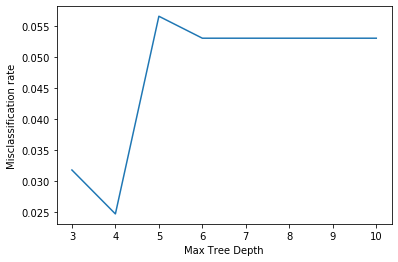

In [26]:
# Prepare the data
x = np.linspace(3, 10, 8)
# x.shape
plt.plot(x, mc)
# plt.plot(x, train, label='Train')
plt.ylabel('Misclassification rate')
plt.xlabel('Max Tree Depth')
# plt.plot(x)
# plt.legend()
plt.show()

In [27]:
#Decision tree depth = 5
from sklearn import tree
import graphviz 
decision_tree = DecisionTreeClassifier(max_depth=d)
decision_tree = decision_tree.fit(X_train,y_train)
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph_data = graphviz.Source(dot_data) 
# graph_data

# AdaBoost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:
depth = [100,200,300,400,500]
predictions = []
for i in depth:
    ada_classifier = AdaBoostClassifier(n_estimators=i, random_state=42)
    ada_classifier.fit(X_train, y_train)
    print('\nWeak learners: ', i)
    predictions = []
    predictions = ada_classifier.predict(X_test)
    cm_ada = confusion_matrix(y_test, predictions)
    print("Accuracy:", (accuracy_score(y_test, predictions))*100)
    print("Misclassification rate:",(1- accuracy_score(y_test, predictions))*100)
    print('Confusion matrix:\n ', cm_ada)
    TN = cm_ada[0, 0]
    FP = cm_ada[0, 1]
    FN = cm_ada[1, 0]
    TP = cm_ada[1, 1]
#     TN,FP,FN,TP
    c_sum = 0
    cost_ada = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_ada = (1/6916)*c_sum
    print('Cost: ', cost_ada)


Weak learners:  100
Accuracy: 96.113074204947
Misclassification rate: 3.886925795053009
Confusion matrix:
  [[212   4]
 [  7  60]]
Cost:  0.10179294389820705

Weak learners:  200
Accuracy: 96.113074204947
Misclassification rate: 3.886925795053009
Confusion matrix:
  [[212   4]
 [  7  60]]
Cost:  0.10179294389820705

Weak learners:  300
Accuracy: 95.0530035335689
Misclassification rate: 4.946996466431097
Confusion matrix:
  [[212   4]
 [ 10  57]]
Cost:  0.14517061885482938

Weak learners:  400
Accuracy: 96.113074204947
Misclassification rate: 3.886925795053009
Confusion matrix:
  [[212   4]
 [  7  60]]
Cost:  0.10179294389820705

Weak learners:  500
Accuracy: 95.75971731448763
Misclassification rate: 4.240282685512364
Confusion matrix:
  [[212   4]
 [  8  59]]
Cost:  0.11625216888374783


# XGBoost Classifier

In [30]:
import xgboost as xgb

In [31]:
num = [100,200,300,400,500]
for i in num:
    clf = xgb.XGBClassifier(n_estimators=i, learning_rate=0.01, random_state=42)
    clf.fit(X_train, y_train)
    predictions = []
    predictions = clf.predict(X_test)
    print('\nWeak learners: ', i)
    cm_xgb = confusion_matrix(y_test, predictions)
    print("Accuracy:", (accuracy_score(y_test, predictions))*100)
    mc = 1- accuracy_score(y_test, predictions)
    print("Misclassification rate:", mc*100)
    print('Confusion matrix:\n ', cm_xgb)
    TN = cm_xgb[0, 0]
    FP = cm_xgb[0, 1]
    FN = cm_xgb[1, 0]
    TP = cm_xgb[1, 1]
    c_sum = 0
    cost_xgb = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_xgb = (1/6916)*c_sum
    print('Cost: ', cost_xgb)


Weak learners:  100
Accuracy: 96.81978798586573
Misclassification rate: 3.180212014134276
Confusion matrix:
  [[213   3]
 [  6  61]]
Cost:  0.08718912666281087

Weak learners:  200
Accuracy: 97.87985865724382
Misclassification rate: 2.1201413427561877
Confusion matrix:
  [[212   4]
 [  2  65]]
Cost:  0.02949681897050318

Weak learners:  300
Accuracy: 98.23321554770318
Misclassification rate: 1.7667844522968212
Confusion matrix:
  [[213   3]
 [  2  65]]
Cost:  0.029352226720647773

Weak learners:  400
Accuracy: 98.23321554770318
Misclassification rate: 1.7667844522968212
Confusion matrix:
  [[213   3]
 [  2  65]]
Cost:  0.029352226720647773

Weak learners:  500
Accuracy: 97.87985865724382
Misclassification rate: 2.1201413427561877
Confusion matrix:
  [[213   3]
 [  3  64]]
Cost:  0.043811451706188546


# Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
mc = []
num = [100,200,300,400,500]
y_pred = []
for i in num:
    rfc = RandomForestClassifier(n_estimators = i, random_state=42)
    rfc = rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print('\nWeak learners :', i)
    cm_rand = confusion_matrix(y_test,y_pred)
#     print('confusion matrix:\n',cm)
    mis_class = 1 - accuracy_score(y_test, y_pred)
    print("Accuracy:", (accuracy_score(y_test, y_pred))*100)
    print("Misclassification rate:",mis_class*100)
#     print("Misclassification rate:", mc)
    print('Confusion matrix:\n ', cm_rand)
    TN = cm_rand[0, 0]
    FP = cm_rand[0, 1]
    FN = cm_rand[1, 0]
    TP = cm_rand[1, 1]
#     TN,FP,FN,TP
    c_sum = 0
    cost_rand = 0
    c_sum = 0*(TN+TP) + 1*(FP) + 100*(FN)
    cost_rand = (1/6916)*c_sum
    print('Cost: ', cost_rand)


Weak learners : 100
Accuracy: 98.93992932862191
Misclassification rate: 1.0600706713780883
Confusion matrix:
  [[214   2]
 [  1  66]]
Cost:  0.01474840948525159

Weak learners : 200
Accuracy: 98.58657243816255
Misclassification rate: 1.4134275618374548
Confusion matrix:
  [[213   3]
 [  1  66]]
Cost:  0.014893001735106997

Weak learners : 300
Accuracy: 98.58657243816255
Misclassification rate: 1.4134275618374548
Confusion matrix:
  [[213   3]
 [  1  66]]
Cost:  0.014893001735106997

Weak learners : 400
Accuracy: 98.58657243816255
Misclassification rate: 1.4134275618374548
Confusion matrix:
  [[213   3]
 [  1  66]]
Cost:  0.014893001735106997

Weak learners : 500
Accuracy: 98.23321554770318
Misclassification rate: 1.7667844522968212
Confusion matrix:
  [[213   3]
 [  2  65]]
Cost:  0.029352226720647773
